<a href="https://colab.research.google.com/github/snehabn/thinkful_capstone1/blob/main/Capstone1_CVD_SNarasimhan_DS_feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Cardiovascular Heart Disease Risk Factors**
By: Sneha Narasimhan

Thinkful Data Science Capstone 1

## Introduction

According to the World Health Organization, “...cardiovascular disease is the leading cause of death globally”[1]. Cardiovascular disease (CVD) is a disease of the heart and/or blood vessels. Some common acute CVD events that may occur due to lack of proper care and health maintenance are heart attacks and stroke [1]. 

The *Risk Factors for Cardiovascular Heart Disease* dataset from Kaggle that will be used for an empirical analysis can be found [here](https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas). This dataset provides general metrics on demographics, lifestyle choices, and additional co-morbidities as they relate to blood pressure readings and cholesterol levels. The analysis done here will show potential relationships between certain lifestyle choices and genetics to the occurrence of CVDs. Physicians and patients can use such data to work together to identify lifestyle changes and treatment plans to aid in the recovery or better management of the illness. 


---

## Methodology 



## Data Setup

In [ ]:
# Set up environment

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Import dataset
url = 'https://raw.githubusercontent.com/snehabn/thinkful_capstone1/main/heart_data%202.csv'
cvd_raw = pd.read_csv(url)

# Preview the raw data
cvd_raw.info()
print()
cvd_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB



,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
cvd_raw

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


The data will need to be first cleaned and re-organized.  The data will be checked for null values and the content of the columns will be examined to ensure that the data is properly usable. 

In [ ]:
# Check for nulls in the dataframe
cvd_raw.isnull().values.any()

False

At this point, after a quick preview of the data, we need to make some assumptions:

1. `age` is in number of days.
2. `gender` (1) is female and (2) is male.
3. `height` is in centimeters.
4. `weight` is in kilograms.
5. `ap_hi` is systolic blood pressure, is measured in mmHg.
6. `ap_lo` is diastolic blood pressure, is measured in mmHg.

*Note: Blood pressure is measured in millimeters mercury or mmHg.*



In [ ]:
# Adjust age column for better readability 
cvd_raw.loc[:,'age'] /=365

cvd_raw.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Renaming blood pressure columns
cvd_adjusted = cvd_raw.rename(columns={'ap_hi':'systolic_bp', 'ap_lo':'diastolic_bp'})
# Check basic statistics of the columns to identify outliers that may need adjustment or removal
cvd_adjusted.describe()

,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Here we can see that both of the blood pressure columns have outliers that need to be adjusted for sensibility.

In [ ]:
# Overview of unique values of 'systolic_bp' and 'diastolic_bp' column
print("systolic_bp")
print(cvd_adjusted['systolic_bp'].unique())
print()
print("diastolic_bp")
print(cvd_adjusted['diastolic_bp'].unique())

systolic_bp
[  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   117   134   166   210   176
   116    10   121    16   112   159   113   118   155   142   131   157
   136   146   138  -100   909   109    85   106   129    93     7    95
   179   156   168   132   104   103   178   175   128   151    15   139
 11500   127    17   108   144   102     1  1420    13   143   701   107
   184   149   167   114   101    60  1500   181   171   202  -115   111
   907    20   188   185   163   173   154   177  -140   174  -120 14020
  1400   240   191   197  1620   152    96   199  -150  1130   193    99
   196   309   401 16020  1202   806  1300   230   207   215    97  1409
 11020    24   960 13010  1110   195  1205   187  2000]

diastolic_bp
[   80    90    70   100    60    85    89

Two things can be noted here. First, there are negative values that we can assume were erroneously entered. By adjusting these to positive values, we can retain the data point. Second, there are also values that are well beyond the natural possible values for blood pressure readings. These outlier entries need to be removed for analysis process.

According to the National Institutes of Health (NIH), the highest blood pressure reading ever recorded for a human was a systolic blood pressure of 370mmHg and diastolic blood pressure of 360mmHg, read as 370/360 [2]. We can assume these to be the natural upper limits.

According to Blood Pressure UK's charts, the lowest blood pressure reading is 70/40 [3]. We can assume these to be the natural lower limits.

In [ ]:
# Set upper limit for systolic_bp
cvd_systolic_adj = (cvd_adjusted[cvd_adjusted['systolic_bp'] <= 370])

# Find absolute value of negative systolic_bp measurements
cvd_systolic_adj['systolic_bp'] = cvd_systolic_adj['systolic_bp'].abs()

# Set lower limit for systolic_bp
cvd_systolic_adj = (cvd_systolic_adj[cvd_systolic_adj['systolic_bp'] > 70])

cvd_systolic_adj.describe()
#cvd_systolic_adj['systolic_bp'].unique()

<ipython-input-8-d2abde81ac65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_systolic_adj['systolic_bp'] = cvd_systolic_adj['systolic_bp'].abs()


,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
count,69761.00000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000
mean,35001.49337,49975.269922,53.341719,1.349622,164.360115,74.212831,127.019466,96.626869,1.367225,1.226516,0.088258,0.053755,0.803845,0.499720
std,20206.01059,28849.300245,6.758840,0.476854,8.199467,14.400186,17.086394,188.551416,0.680605,0.572304,0.283672,0.225535,0.397090,0.500004
min,0.00000,0.000000,29.583562,1.000000,55.000000,10.000000,80.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17501.00000,25008.000000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35001.00000,50004.000000,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.00000,74889.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.00000,99999.000000,64.967123,2.000000,250.000000,200.000000,309.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Set upper limit for diastolic_bp
cvd_adj = (cvd_systolic_adj[cvd_systolic_adj['diastolic_bp'] <= 360])

# Find absolute value of negative diastolic_bp measurements
cvd_adj['diastolic_bp'] = cvd_adj['diastolic_bp'].abs()

# Set lower limit for diastolic_bp
cvd_adj = (cvd_adj[cvd_adj['diastolic_bp'] > 40])

cvd_adj.describe()
#cvd_adj['diastolic_bp'].unique()

<ipython-input-9-774d953b075d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_adj['diastolic_bp'] = cvd_adj['diastolic_bp'].abs()


,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
count,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000
mean,35002.297780,49976.411843,53.327703,1.348775,164.362884,74.124062,126.627749,81.387160,1.364746,1.225928,0.087997,0.053598,0.803424,0.494967
std,20203.539434,28845.765640,6.761952,0.476586,8.184653,14.330912,16.740355,9.648456,0.678992,0.571891,0.283293,0.225225,0.397412,0.499978
min,0.000000,0.000000,29.583562,1.000000,55.000000,11.000000,80.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17497.750000,25002.750000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35011.500000,50018.000000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52488.250000,74870.750000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.967123,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# List of columns to drop
columns_to_drop = ['index', 'id']

In [ ]:
cvd_adj

,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Drop the columns
cvd_adj=cvd_adj.drop(columns=columns_to_drop)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

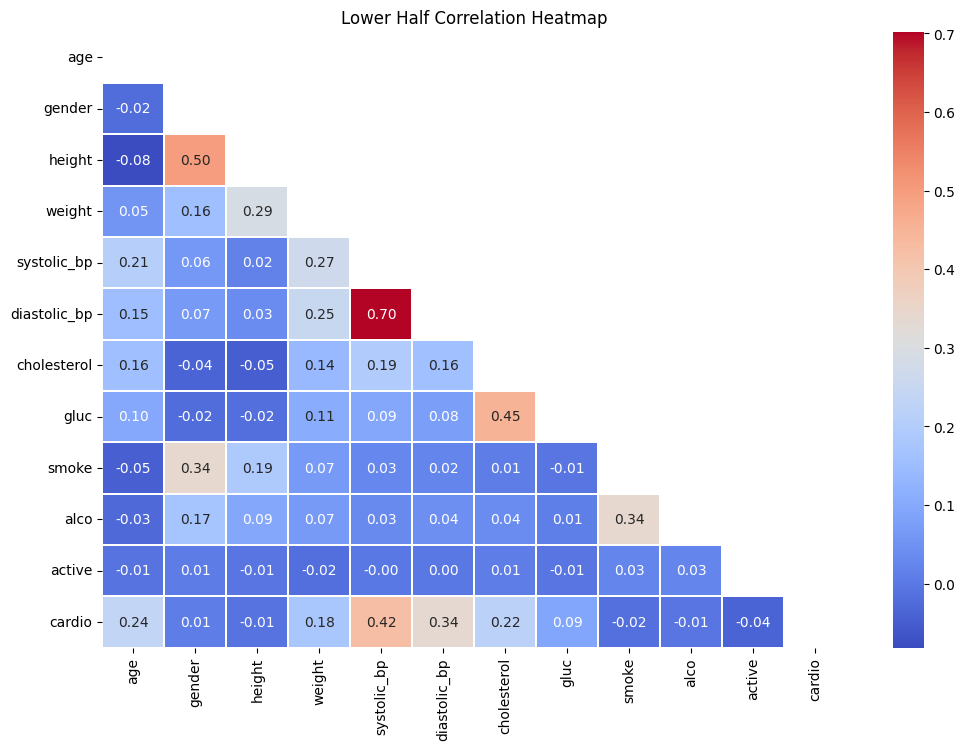

In [ ]:
# Calculate the correlation matrix
corr_matrix = cvd_adj.corr()

# Create a mask to hide the upper half
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=mask)
plt.title('Lower Half Correlation Heatmap')

# Show the plot
plt.show()

## as the heatmap shows that .70 indicates a strong postive correlation. this means that when one featue increase, th other feature also tends to incrase. 

In [ ]:
'''
import matplotlib.pyplot as plt

# Calculate mean systolic blood pressure for each group
smokers_mean = smokers['systolic_bp'].mean()
nonsmokers_mean = nonsmokers['systolic_bp'].mean()

# Create scatter plot
plt.scatter(['Smokers', 'Nonsmokers'], [smokers_mean, nonsmokers_mean])
plt.title("Mean Systolic Blood Pressure by Group")
plt.xlabel("Group")
plt.ylabel("Mean Systolic Blood Pressure")

# Show the plot
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n\n# Calculate mean systolic blood pressure for each group\nsmokers_mean = smokers[\'systolic_bp\'].mean()\nnonsmokers_mean = nonsmokers[\'systolic_bp\'].mean()\n\n# Create scatter plot\nplt.scatter([\'Smokers\', \'Nonsmokers\'], [smokers_mean, nonsmokers_mean])\nplt.title("Mean Systolic Blood Pressure by Group")\nplt.xlabel("Group")\nplt.ylabel("Mean Systolic Blood Pressure")\n\n# Show the plot\nplt.show()\n'

## Analysis:

#### 1. Do smokers have a higher systolic blood pressure than non-smokers?

Here we will look at the systolic blood pressure. This the pressure exerted by the heart during beating [4].

In [ ]:
# Split up the dataset
smokers = cvd_adj[(cvd_adj['smoke'] == 1)]
smokers.info()
print()
nonsmokers = cvd_adj[(cvd_adj['smoke'] == 0)]
nonsmokers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6050 entries, 14 to 69995
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6050 non-null   float64
 1   gender        6050 non-null   int64  
 2   height        6050 non-null   int64  
 3   weight        6050 non-null   float64
 4   systolic_bp   6050 non-null   int64  
 5   diastolic_bp  6050 non-null   int64  
 6   cholesterol   6050 non-null   int64  
 7   gluc          6050 non-null   int64  
 8   smoke         6050 non-null   int64  
 9   alco          6050 non-null   int64  
 10  active        6050 non-null   int64  
 11  cardio        6050 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 614.5 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62702 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           62702 non-null  float

In [ ]:
# plt.hist(smokers['systolic_bp'], alpha = .5, label = "smokers")
# plt.hist(nonsmokers['systolic_bp'], alpha = .5, label = "nonsmokers")
# plt.legend(loc="upper right")
# plt.show()

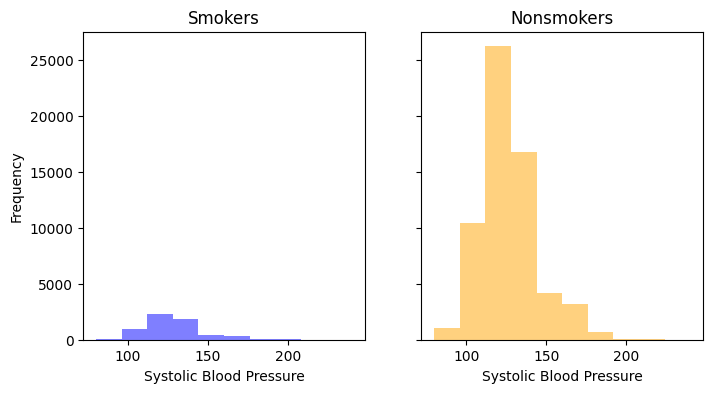

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Smokers' systolic blood pressure distribution
ax1.hist(smokers['systolic_bp'], alpha=0.5, label="Smokers", color='blue')
ax1.set_title("Smokers")
ax1.set_xlabel("Systolic Blood Pressure")
ax1.set_ylabel("Frequency")

# Nonsmokers' systolic blood pressure distribution
ax2.hist(nonsmokers['systolic_bp'], alpha=0.5, label="Nonsmokers", color='orange')
ax2.set_title("Nonsmokers")
ax2.set_xlabel("Systolic Blood Pressure")

# Show the plot
plt.show()


In [ ]:
# Check for normality using skewness and kurtosis
print(stats.describe(smokers['systolic_bp']))
print(stats.describe(nonsmokers['systolic_bp']))

## Both values are within range for normality.

DescribeResult(nobs=6050, minmax=(80, 240), mean=128.10297520661157, variance=306.27225102434795, skewness=0.9206834810443177, kurtosis=1.8543261122547223)
DescribeResult(nobs=62702, minmax=(80, 240), mean=126.48540716404581, variance=277.5022431469211, skewness=0.9169966352678034, kurtosis=1.8324629761512714)


Based on visual examination and the skewness and kurtosis measures, these two groups appear to be normally distributed. We can proceed to perform a student's t-test.


DS comments above: For a perfect nromal distribution, sjewness would be 0, and jurtosis would be 3.  the skewness is apporximataely following normal almost but not kurtosis. keep in mind, this visulization can not make final decision, so you would need to performance shpur-wilk test 

In [ ]:
# Perform the Shapiro-Wilk test for smokers
stat_smokers, p_smokers = stats.shapiro(smokers['systolic_bp'])
print("Smokers:")
print("  Statistic:", stat_smokers)
print("  P-value:", p_smokers)

# Perform the Shapiro-Wilk test for nonsmokers
stat_nonsmokers, p_nonsmokers = stats.shapiro(nonsmokers['systolic_bp'])
print("Nonsmokers:")
print("  Statistic:", stat_nonsmokers)
print("  P-value:", p_nonsmokers)


Smokers:
  Statistic: 0.9187635779380798
  P-value: 0.0
Nonsmokers:
  Statistic: 0.9085284471511841
  P-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


the pvalue is less than alpha, the test suggests that the systolic blood pressure data for both smokers and nonsmokers do not follow a normal distribution

## applying a normalization technique before performaning a t-test

In [ ]:
import numpy as np

# Log transformation for smokers and nonsmokers systolic blood pressure
smokers['systolic_bp_log'] = np.log(smokers['systolic_bp'])
nonsmokers['systolic_bp_log'] = np.log(nonsmokers['systolic_bp'])


<ipython-input-21-29a18ef1b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers['systolic_bp_log'] = np.log(smokers['systolic_bp'])
<ipython-input-21-29a18ef1b421>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsmokers['systolic_bp_log'] = np.log(nonsmokers['systolic_bp'])


In [ ]:
nonsmokers.columns

Index(['age', 'gender', 'height', 'weight', 'systolic_bp', 'diastolic_bp',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'systolic_bp_log'],
      dtype='object')

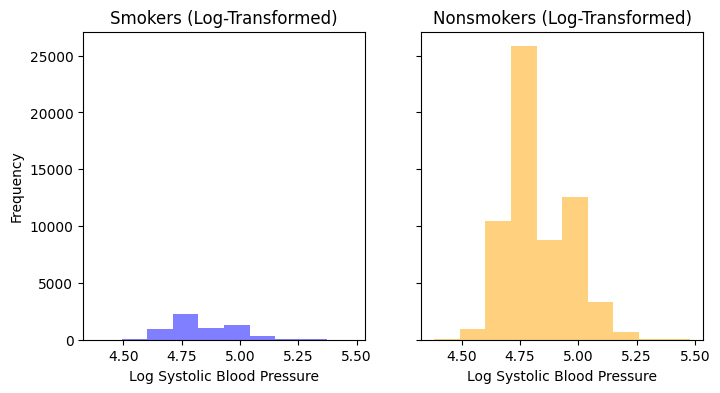

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Smokers' log-transformed systolic blood pressure distribution
ax1.hist(smokers['systolic_bp_log'], alpha=0.5, label="Smokers", color='blue')
ax1.set_title("Smokers (Log-Transformed)")
ax1.set_xlabel("Log Systolic Blood Pressure")
ax1.set_ylabel("Frequency")

# Nonsmokers' log-transformed systolic blood pressure distribution
ax2.hist(nonsmokers['systolic_bp_log'], alpha=0.5, label="Nonsmokers", color='orange')
ax2.set_title("Nonsmokers (Log-Transformed)")
ax2.set_xlabel("Log Systolic Blood Pressure")

# Show the plot
plt.show()


## this step, we will  use the Shapiro-Wilk test to verify if the data comes from a normal distribution or not. 

  1. Ho: the data comes from a normal distribution
  2. Ha: the data is not from a normal distribution 

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for smokers
stat_smokers, p_smokers = shapiro(smokers['systolic_bp'])
print("Smokers:")
print("  Statistic:", stat_smokers)
print("  P-value:", p_smokers)

# Perform the Shapiro-Wilk test for nonsmokers
stat_nonsmokers, p_nonsmokers = shapiro(nonsmokers['systolic_bp'])
print("Nonsmokers:")
print("  Statistic:", stat_nonsmokers)
print("  P-value:", p_nonsmokers)


Smokers:
  Statistic: 0.9187635779380798
  P-value: 0.0
Nonsmokers:
  Statistic: 0.9085284471511841
  P-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The results of the Shapiro-Wilk test indicate that the systolic blood pressure data for both smokers and nonsmokers are not normally distributed.

## mext step: we may consider applying a transformation of box-cox to make it more normally distributed



In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to smokers and nonsmokers systolic blood pressure data
smokers['systolic_bp_boxcox'], _ = boxcox(smokers['systolic_bp'])
nonsmokers['systolic_bp_boxcox'], _ = boxcox(nonsmokers['systolic_bp'])


<ipython-input-25-be825cadcd8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers['systolic_bp_boxcox'], _ = boxcox(smokers['systolic_bp'])
<ipython-input-25-be825cadcd8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsmokers['systolic_bp_boxcox'], _ = boxcox(nonsmokers['systolic_bp'])


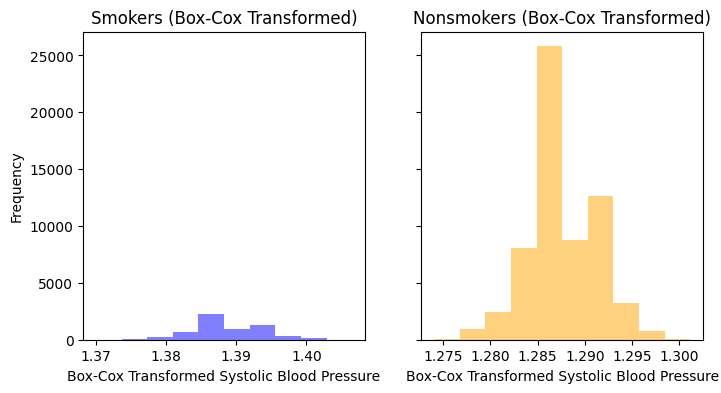

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Smokers' Box-Cox transformed systolic blood pressure distribution
ax1.hist(smokers['systolic_bp_boxcox'], alpha=0.5, label="Smokers", color='blue')
ax1.set_title("Smokers (Box-Cox Transformed)")
ax1.set_xlabel("Box-Cox Transformed Systolic Blood Pressure")
ax1.set_ylabel("Frequency")

# Nonsmokers' Box-Cox transformed systolic blood pressure distribution
ax2.hist(nonsmokers['systolic_bp_boxcox'], alpha=0.5, label="Nonsmokers", color='orange')
ax2.set_title("Nonsmokers (Box-Cox Transformed)")
ax2.set_xlabel("Box-Cox Transformed Systolic Blood Pressure")

# Show the plot
plt.show()


In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for Box-Cox transformed smokers data
stat_smokers_boxcox, p_smokers_boxcox = shapiro(smokers['systolic_bp_boxcox'])
print("Box-Cox Transformed Smokers:")
print("  Statistic:", stat_smokers_boxcox)
print("  P-value:", p_smokers_boxcox)

# Perform the Shapiro-Wilk test for Box-Cox transformed nonsmokers data
stat_nonsmokers_boxcox, p_nonsmokers_boxcox = shapiro(nonsmokers['systolic_bp_boxcox'])
print("Box-Cox Transformed Nonsmokers:")
print("  Statistic:", stat_nonsmokers_boxcox)
print("  P-value:", p_nonsmokers_boxcox)


Box-Cox Transformed Smokers:
  Statistic: 0.9478474259376526
  P-value: 6.573491096147717e-42
Box-Cox Transformed Nonsmokers:
  Statistic: 0.937014102935791
  P-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the p-values are less than the common significance level of 0.05,  reject the null hypothesis that the Box-Cox transformed data comes from a normal distribution.Therefore the test suggests that the Box-Cox transformed systolic blood pressure data for both groups do not follow a normal distributio

## Final step:  After applying the transformation techniques, the results for both groups show that the data does not follow a normal distribution. This implies that we cannot use a standard t-test, as it assumes normality of the data. Instead, we should consider using a non-parametric test, such as the Mann-Whitney U test, which does not require the assumption of normality

1. H₀ (null hypothesis): There is no significant difference between the distributions of systolic blood pressure for smokers and nonsmokers.

2. Hₐ (alternative hypothesis): There is a significant difference between the distributions of systolic blood pressure for smokers and nonsmokers.

In [ ]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test for smokers and nonsmokers
u_stat, p_value = mannwhitneyu(smokers['systolic_bp'], nonsmokers['systolic_bp'])

print("Mann-Whitney U Statistic:", u_stat)
print("P-value:", p_value)


Mann-Whitney U Statistic: 200152064.5
P-value: 1.5974546979829296e-13


the p-value (1.597e-13) is much smaller than alpha at 0.05, reject the null hypothesis, which states that there is no difference between the distributions of the two groups. This implies that there is a significant difference between the distributions of systolic blood pressure for smokers and nonsmokers

In [ ]:
# Get 95% confidence interval
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(smokers['systolic_bp'], nonsmokers['systolic_bp'])


'The difference in means at the 95% confidence interval (two-tail) is between -2.0774345206175706 and -1.1577015645139588.'

In [ ]:
ci_result = get_95_ci(smokers['systolic_bp'], nonsmokers['systolic_bp'])
print(ci_result)


The difference in means at the 95% confidence interval (two-tail) is between -2.0774345206175706 and -1.1577015645139588.


## The result shows that we can be 95% confident that the actual difference in mean systolic blood pressure between smokers and nonsmokers lies within the range of -2.0774 to -1.1577. Since the confidence interval is entirely negative, this implies that, on average, the systolic blood pressure of nonsmokers is 1.1577 to 2.0774 units lower than that of smokers

Here we can say with 95% confidence that patients who are nonsmokers have on average, a systolic blood pressure 1.158 to 2.077 mmHg lower than patients who are smokers.

[[Text(0, 0, 'smokers'), Text(1, 0, 'nonsmokers')]]

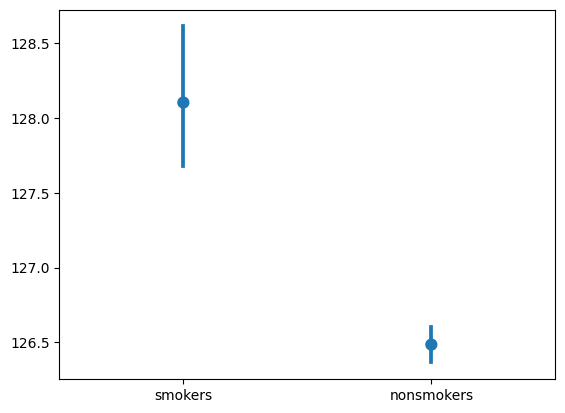

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[smokers['systolic_bp'],
                        nonsmokers['systolic_bp']], join=False)
                        
g.set(xticklabels = ['smokers', 'nonsmokers'])

Visually, we can see that smokers do infact have a higher average systolic blood pressure than nonsmokers.

### 2. Do those who are regularly active have a higher blood pressure?

We will again look at systolic blood pressure to determine if there is a difference in average heart health between active patients and not active patients.

In [ ]:
# Split up the dataset
active = cvd_adj[(cvd_adj['active'] == 1)]
active.info()
print()
not_active = cvd_adj[(cvd_adj['active'] == 0)]
not_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55237 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           55237 non-null  float64
 1   gender        55237 non-null  int64  
 2   height        55237 non-null  int64  
 3   weight        55237 non-null  float64
 4   systolic_bp   55237 non-null  int64  
 5   diastolic_bp  55237 non-null  int64  
 6   cholesterol   55237 non-null  int64  
 7   gluc          55237 non-null  int64  
 8   smoke         55237 non-null  int64  
 9   alco          55237 non-null  int64  
 10  active        55237 non-null  int64  
 11  cardio        55237 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 5.5 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13515 entries, 2 to 69998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           13515 non-null  float64

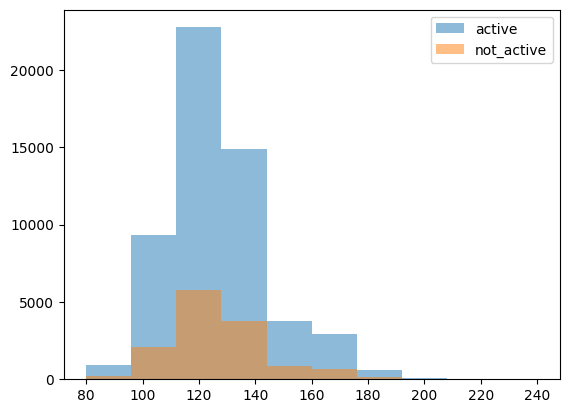

In [ ]:
plt.hist(active['systolic_bp'], alpha = .5, label = "active")
plt.hist(not_active['systolic_bp'], alpha = .5, label = "not_active")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Check for normality using skewness and kurtosis
print(stats.describe(active['systolic_bp']))
print(stats.describe(not_active['systolic_bp']))

DescribeResult(nobs=55237, minmax=(80, 240), mean=126.61268714810724, variance=280.8297456160223, skewness=0.907522857274614, kurtosis=1.779715397349059)
DescribeResult(nobs=13515, minmax=(80, 240), mean=126.68930817610062, variance=277.8430076240526, skewness=0.9671269799863691, kurtosis=2.096207286108199)


Based on visual examination and the skewness and kurtosis measures, these two groups appear to be normally distributed. We can proceed to perform a student's t-test.


In [ ]:
# Perform t-test
stats.ttest_ind(active['systolic_bp'], not_active['systolic_bp'])

Ttest_indResult(statistic=-0.4769372650266552, pvalue=0.6334083109825166)

Based on the t-test statistics and p-value, the null hypothesis is proved true, there is no significant difference in systolic blood pressure between active patients and not active patients.

[[Text(0, 0, 'active'), Text(1, 0, 'not_active')]]

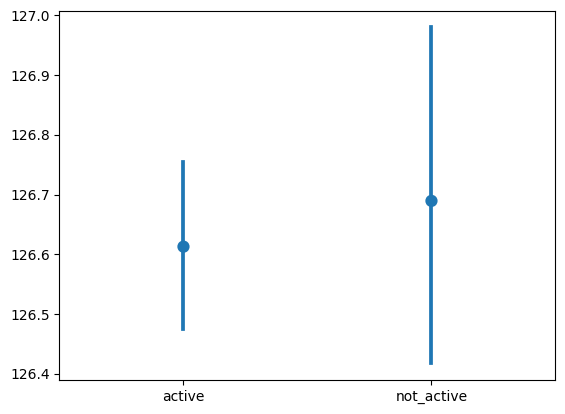

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[active['systolic_bp'],
                        not_active['systolic_bp']], join=False)
                        
g.set(xticklabels = ['active', 'not_active'])

[Text(1, 0, 'active'), Text(2, 0, 'not_active')]

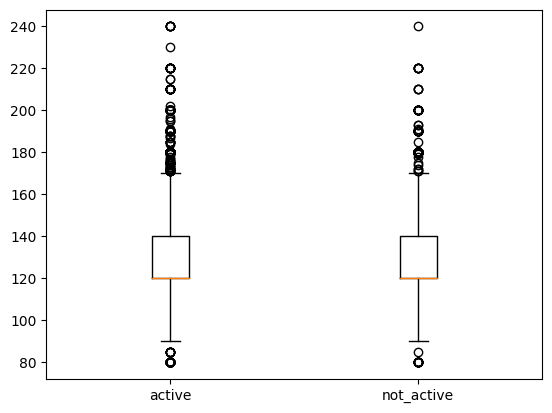

In [ ]:
my_dict = {'active': active['systolic_bp'], 'not_active': not_active['systolic_bp']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

#plt.boxplot(cvd_positive['weight'])

Based on the t-test statistics and p-value, the null hypothesis is proved true, there is no significant difference in systolic blood pressure between active patients and not active patients.

### 3. Do those who have a cardiovascular disease weigh more?

In [ ]:
# Split up the dataset
cvd_positive = cvd_adj[(cvd_adj['cardio'] == 1)]
cvd_positive.info()
print()
cvd_negative = cvd_adj[(cvd_adj['cardio'] == 0)]
cvd_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34030 entries, 1 to 69998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           34030 non-null  float64
 1   gender        34030 non-null  int64  
 2   height        34030 non-null  int64  
 3   weight        34030 non-null  float64
 4   systolic_bp   34030 non-null  int64  
 5   diastolic_bp  34030 non-null  int64  
 6   cholesterol   34030 non-null  int64  
 7   gluc          34030 non-null  int64  
 8   smoke         34030 non-null  int64  
 9   alco          34030 non-null  int64  
 10  active        34030 non-null  int64  
 11  cardio        34030 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 3.4 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34722 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           34722 non-null  float64

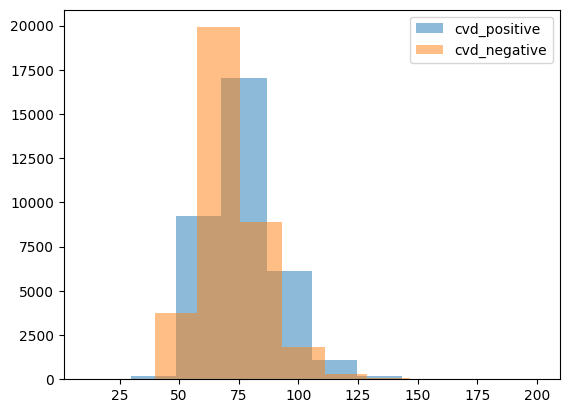

In [ ]:
plt.hist(cvd_positive['weight'], alpha = .5, label = "cvd_positive")
plt.hist(cvd_negative['weight'], alpha = .5, label = "cvd_negative")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Check for normality using skewness and kurtosis
print(stats.describe(cvd_positive['weight']))
print(stats.describe(cvd_negative['weight']))

DescribeResult(nobs=34030, minmax=(11.0, 200.0), mean=76.72276814575376, variance=221.31666099622882, skewness=0.9875633188196379, kurtosis=2.329789605998295)
DescribeResult(nobs=34722, minmax=(22.0, 200.0), mean=71.57714705374114, variance=176.65120362855748, skewness=0.9981769019461655, kurtosis=2.882992052899043)


In [ ]:
# Perform t-test
stats.ttest_ind(cvd_positive['weight'], cvd_negative['weight'])

Ttest_indResult(statistic=47.848124303240674, pvalue=0.0)

In [ ]:
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(cvd_positive['weight'], cvd_negative['weight'])

'The difference in means at the 95% confidence interval (two-tail) is between -5.3566391225851255 and -4.934603061440111.'

We can say with 95% confidence that patients without CVD weigh on average 4.935 to 5.357 kilograms less than patients with CVD.

[[Text(0, 0, 'cvd_positive'), Text(1, 0, 'cvd_negative')]]

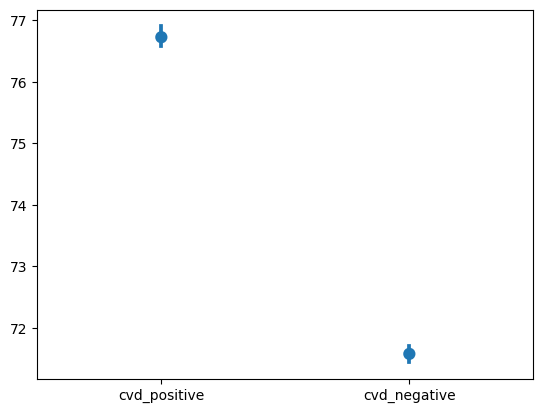

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[cvd_positive['weight'],
                        cvd_negative['weight']], join=False)
                        
g.set(xticklabels = ['cvd_positive', 'cvd_negative'])

[Text(1, 0, 'cvd_positive'), Text(2, 0, 'cvd_negative')]

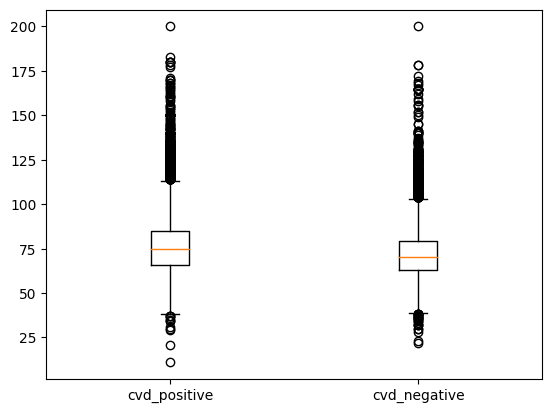

In [ ]:
my_dict = {'cvd_positive': cvd_positive['weight'], 'cvd_negative': cvd_negative['weight']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

#plt.boxplot(cvd_positive['weight'])

Based on the t-test statistics, the null hypothesis is refuted. There is a significant difference in weight between patients with CVD and those without it. As can be observed from the pinpoint plot, those with the diease, on average have a higher weight than those who do not have the diease.

## Citations

[1] World Health Organization. (2023). Cardiovascular diseases (CVDs). World Health Organization. Retrieved March 31, 2023, from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

[2] Narloch, J. A., & Brandstater, M. E. (1995). Influence of breathing technique on arterial blood pressure during heavy weight lifting. Archives of physical medicine and rehabilitation, 76(5), 457–462. https://doi.org/10.1016/s0003-9993(95)80578-8

[3] What do the numbers mean? Blood Pressure UK - Helping you to lower your blood pressure. (2021). Retrieved April 2, 2023, from https://www.bloodpressureuk.org/your-blood-pressure/understanding-your-blood-pressure/what-do-the-numbers-mean/ 

[4] Mayo Foundation for Medical Education and Research. (2022, March 1). Pulse pressure: An indicator of heart health? Mayo Clinic. Retrieved April 2, 2023, from https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189 